## Making trees work - Exercise
```In this exercise you will experience with Decision Trees and Random Forests. During this part you will explore the different features of them and will plot your results. Hence, whenever exploration tasks are marked with (*), know that you are asked to plot two graphs (on the same plot): the training score against the explored feature and the test score against it.```

```~Ittai Haran```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

```Read the dataset. In this dataset, you are provided over a hundred variables describing attributes of life insurance applicants. The task is to predict the "Response" variable.```

```the dataset can be found in: ```https://drive.google.com/open?id=1t_P64gM1M1_c2n4PvH7AZoELH2CNh6ui

In [2]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('insurance_fixed.csv')
X = df.drop(['Response'], axis = 1)
Y = df['Response']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3)

```We will start by using Decision trees. Use a simple DecisionTreeClassifier with default values to predict on your train and on your test. Evaluate the model using the accuracy metric, which you can find in sklearn.```

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
decision_tree_mdl = DecisionTreeClassifier()
decision_tree_mdl.fit(X_train, Y_train)

y_predict = decision_tree_mdl.predict(X_test)
test_acc = accuracy_score(Y_test, y_predict)

print("test acc=", test_acc)
print("train acc=", accuracy_score(Y_train, decision_tree_mdl.predict(X_train)))

test acc= 0.42509121526803256
train acc= 0.9999759418755714


```Unfortunately, you are at overfit. Now let's try to get better. Try playing with the max depth of the tree, for``` $1\leq depth \leq25$ ```(*) (This means you are asked to plot some graphs, remember? :) )```

```Choose the optimal max_depth based on the graph you got.```

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:29<00:00,  1.17s/it]


'\nWe can see on he graph that the best depth is 10\n'

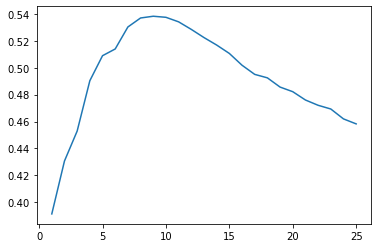

In [5]:
from tqdm import tqdm

list_depths = np.linspace(1, 25, 25)
list_acc = []
for depth in tqdm(list_depths):
    decision_tree_mdl = DecisionTreeClassifier(max_depth=depth)
    decision_tree_mdl.fit(X_train, Y_train)

    y_predict = decision_tree_mdl.predict(X_test)
    test_acc = accuracy_score(Y_test, y_predict)
    list_acc.append(test_acc)

plt.plot(list_depths, list_acc)

"""
We can see on he graph that the best depth is 10
"""

```Choose the best max_depth you found. Now try playing with min_samples_leaf. use the following values:
[1, 10, 100, 300,700, 1000]. Do it also with max_depth = 20. What can we learn from the graphs? Please answer the question ```$\ \underline{in\ another\ cell}$```.(*)```

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.26it/s]


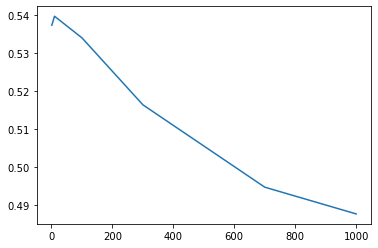

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.03s/it]


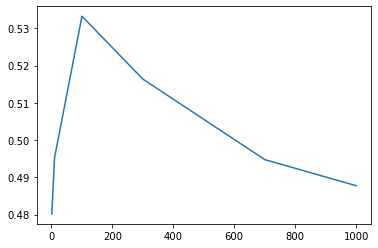

In [6]:
list_sample_leaf = [1, 10, 100, 300,700, 1000]


def seach_sample_leaf(list_sample_leaf, depth):
    list_acc = []
    for sample_leaf in tqdm(list_sample_leaf):
        decision_tree_mdl = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=sample_leaf)
        decision_tree_mdl.fit(X_train, Y_train)

        y_predict = decision_tree_mdl.predict(X_test)
        test_acc = accuracy_score(Y_test, y_predict)
        list_acc.append(test_acc)

    plt.plot(list_sample_leaf, list_acc)
    plt.show()
    plt.close()
    

seach_sample_leaf(list_sample_leaf, depth=10)
seach_sample_leaf(list_sample_leaf, depth=20)

In [7]:
"""
It is not correct to choose the best value for one hyper-parameter, and then use this value in order to search values of others hyper-parameters. We need to search over all the 
"""

'\nIt is not correct to choose the best value for one hyper-parameter, and then use this value in order to search values of others hyper-parameters. We need to search over all the \n'

```Decision Tree is a very nice algorithm, especially because it is very intuitive and explainable. We can even draw it!
Train a simple Decision Tree with max_depth = 3. Call it basic_tree and run the cell below. Examine the file tree.png you created.```

In [8]:
basic_tree = DecisionTreeClassifier(max_depth=3)
basic_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(basic_tree, out_file = 'tree.dot', filled  = True,
                rounded = True, feature_names = df.drop(["Response"], axis=1).columns)
!dot -Tpng tree.dot -o tree.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


```Look at the tree you got. What, would you say, are the most important features?
As you recall, we talked about feature importance in the lecture notes. Use the attribute feature_importance_ of your tree to get a list of the most important features.```

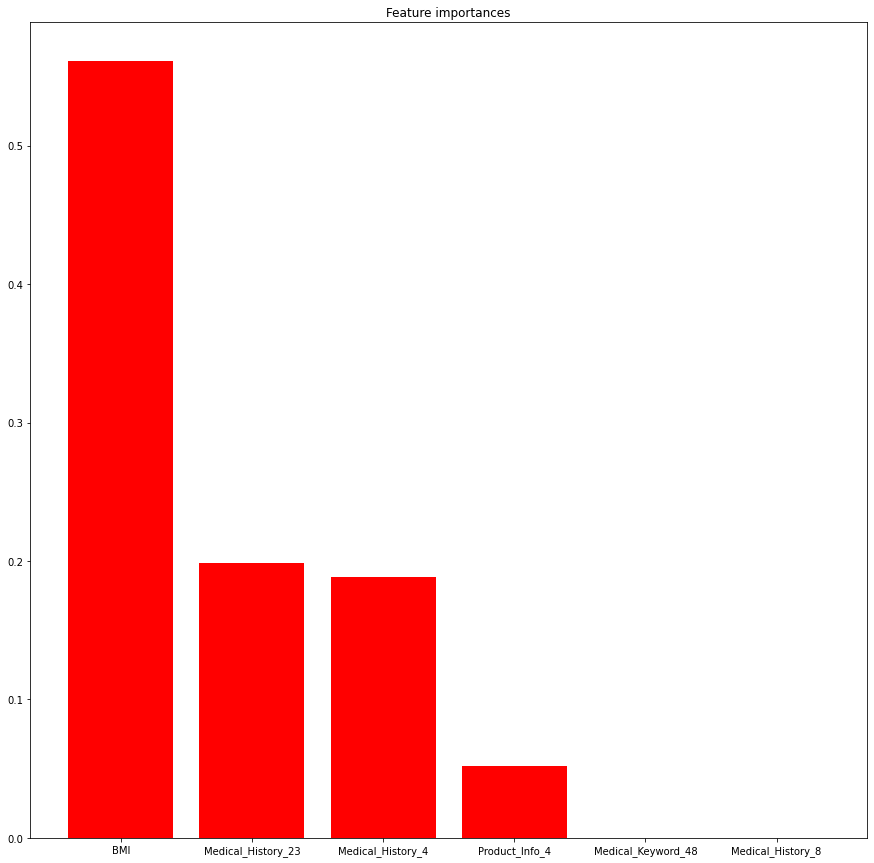

In [10]:
importances = basic_tree.feature_importances_
indices = np.argsort(importances)[::-1]
features_name = df.drop(["Response"], axis=1).columns

# Take only 5 best
importances_20 = importances[indices][0:6]
features_20 = features_name[indices][0:6]

plt.figure(figsize=(15,15))
plt.title("Feature importances")
plt.bar(features_20, importances_20,
        color="r", align="center")
plt.show()
plt.close()

```We will now move to Random Forest. Repeat the exlporations tasks with a Random forest with 100 trees (max depth and min samples leaf). In addition, vary the number of trees between 10 and 400, while maintaining low max_depth (*) and the max_feature parameter, between 0.1 and 1 (*). Try explaining the graphs you see ```$\ \underline{in\ a\ different\ cell}$```. Use the flag n_jobs = -1 in your experiments to accelerate your computation time. Make sure to understand where your model is overfitted.```

In [11]:
from sklearn.ensemble import RandomForestClassifier

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:44<00:00,  2.22s/it]


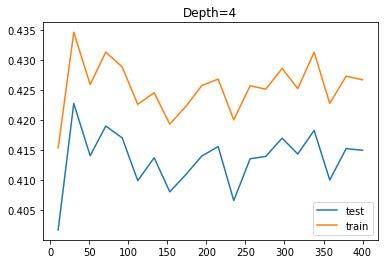

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:29<00:00,  4.46s/it]


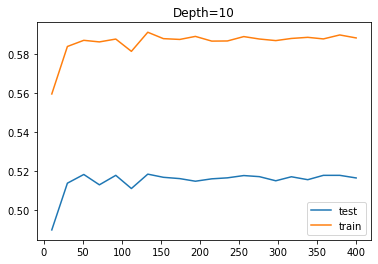

In [12]:
def search_nb_estimators(depth):
    test_acc, train_acc = [], []
    number_of_trees = np.linspace(10, 400, 20, dtype=int)

    for tree in tqdm(number_of_trees):
        random_forest = RandomForestClassifier(n_estimators=tree, max_depth=depth, n_jobs=-1)
        random_forest.fit(X_train, Y_train)
        test_acc.append(accuracy_score(Y_test, random_forest.predict(X_test)))
        train_acc.append(accuracy_score(Y_train, random_forest.predict(X_train)))

    plt.figure()
    plt.title("Depth=" + str(depth))
    plt.plot(number_of_trees, test_acc, label="test")
    plt.plot(number_of_trees, train_acc, label="train")
    plt.legend()
    plt.show()
    plt.close()
    
search_nb_estimators(depth=4)
search_nb_estimators(depth=10)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.42it/s]


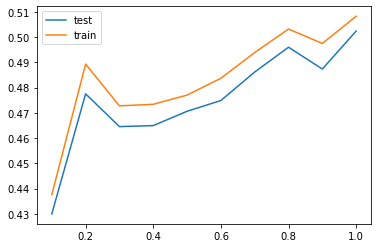

In [13]:
max_features_list = np.arange(0.1,1.1,0.1)
test_acc, train_acc = [], []

for max_features in tqdm(max_features_list):
    random_forest = RandomForestClassifier(n_estimators=2, max_depth=4, n_jobs=-1, max_features=max_features)
    random_forest.fit(X_train, Y_train)
    test_acc.append(accuracy_score(Y_test, random_forest.predict(X_test)))
    train_acc.append(accuracy_score(Y_train, random_forest.predict(X_train)))
    
plt.figure()
plt.plot(max_features_list, test_acc, label="test")
plt.plot(max_features_list, train_acc, label="train")
plt.legend()
plt.show()

```As you could see, at least one of your graphs turned out to be very noisy. Use K Fold cross validation to evalute your model more accurately. In K Fold cross validation we split our data into K segments, and for each ```$\ 1\leq i\leq K\ $``` we test our model on the i-th segment while training it using the others.```

```Use the Random Forest to surpass the best score you got using Decision Tree.```

In [14]:
from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier()

max_features = np.arange(0.1,1.1,0.1)
min_samples_split = [5, 10, 15]
min_samples_leaf = [1, 2, 4, 5]
bootstrap = [True, False]
criterion = ['gini', 'entropy']
n_estimators = [10,40,80,120,180,200,250,300]
max_depth = np.linspace(1, 20, 20, dtype=int)

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion,
               }

scoring = make_scorer(metrics.accuracy_score)

random_model = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid,
                                              n_iter=200, verbose=2, n_jobs=-1,
                                              return_train_score=True, cv=3, scoring=scoring)
random_model.fit(X_train, Y_train)

y_pred = random_model.predict(X_test)
print("Final accuracy", accuracy_score(Y_test, y_pred))
print("Best params", random_model.best_params_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Final accuracy 0.5607634016278417
Best params {'n_estimators': 180, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 0.30000000000000004, 'max_depth': 18, 'criterion': 'entropy', 'bootstrap': False}


## Extra thinking on feature importance

```We talked about feature importance in the lecture notes. get the feature importance of each feature using a decision tree and using a random forest. Use in both cases the best hyper parameters you found so far. Discuss the differences between the answers``` $\underline{in\ a\ cell}$.

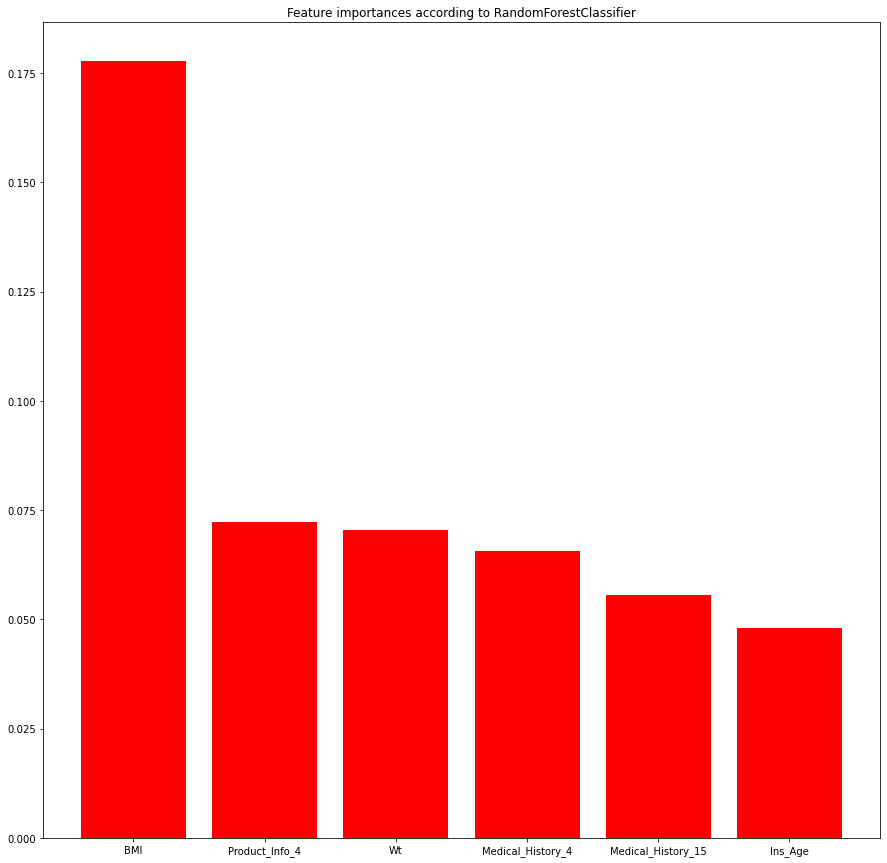

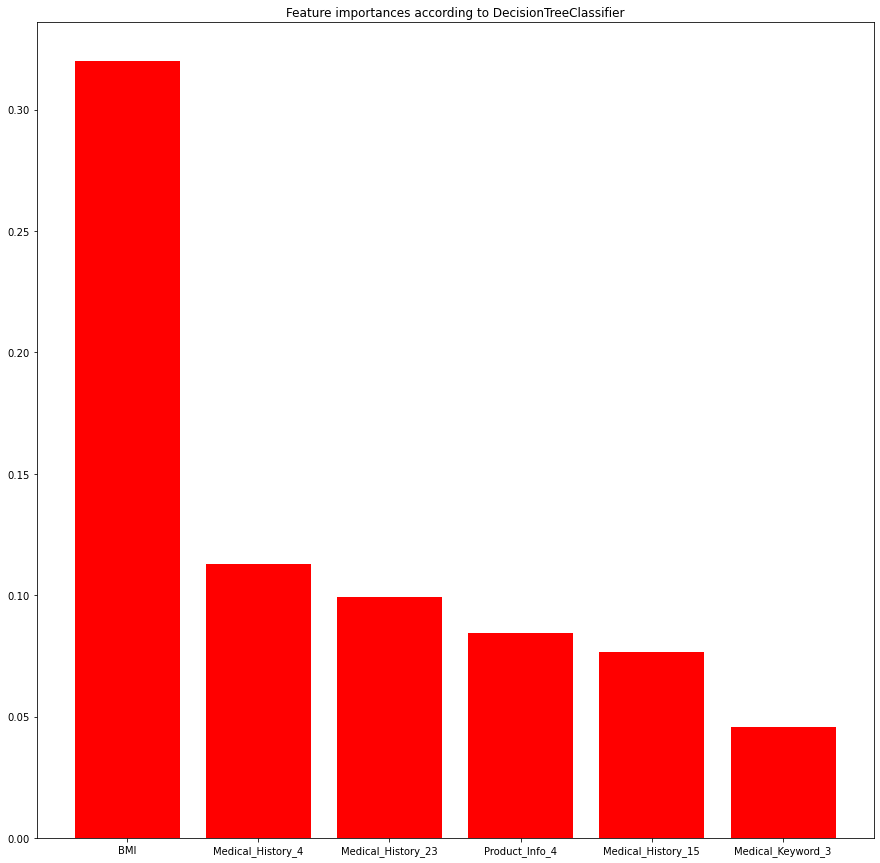

In [15]:
rf_model = RandomForestClassifier(n_estimators= 180, min_samples_split= 10, min_samples_leaf= 2, 
                                  max_features= 0.30000000000000004, max_depth= 18, criterion= 'entropy', 
                                  bootstrap= False)
rf_model.fit(X_train, Y_train)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features_name = df.drop(["Response"], axis=1).columns

# Take only 5 best
importances_20 = importances[indices][0:6]
features_20 = features_name[indices][0:6]

plt.figure(figsize=(15,15))
plt.title("Feature importances according to RandomForestClassifier")
plt.bar(features_20, importances_20,
        color="r", align="center")
plt.show()
plt.close()

basic_tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)
basic_tree.fit(X_train, Y_train)

importances = basic_tree.feature_importances_
indices = np.argsort(importances)[::-1]
features_name = df.drop(["Response"], axis=1).columns

# Take only 5 best
importances_20 = importances[indices][0:6]
features_20 = features_name[indices][0:6]

plt.figure(figsize=(15,15))
plt.title("Feature importances according to DecisionTreeClassifier")
plt.bar(features_20, importances_20,
        color="r", align="center")
plt.show()
plt.close()

```We can define a concept of feature importance for linear regression: Suppose you have two features, ```$x_1$ ```and``` $x_2$. ```Suppose that you got a linear regression of the form```

$y = 100\cdot x_1 + 1\cdot x_2$

```What feature is more important? What if we have -100 instead of 100? Generalize this idea to any number of features. Train a linear regression on your data and get the feature importances.```

In [16]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

x_1 = np.linspace(1, 100, 100)
x_2 = np.linspace(100, 200, 100)
y = 100*x_1 + x_2
X = np.stack((x_1, x_2), axis=1)
print(X.shape)

model = LinearRegression()
model.fit(X, y)

importance = model.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

(100, 2)
Feature: 0, Score: 99.14102
Feature: 1, Score: 1.85039


## Ensemble methods and stacking
```In this part we will explore the concept of model stacking: that is, training a model, the combining model, on the outputs of several other models. Hence, the stacking method has two steps: first we train our models, and than we train the combining model using the outputs of those models.```

```In the setting of stacking models it is very important to train the several models on one segment of the data and train the combining model on another segment. Hence, start by splitting the data to 3 segments: train_1 segment, 35% of the data, train_2 segment, 35% of the data, and test segment, the last 30% of the data.```

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('insurance_fixed.csv')
X = df.drop(['Response'], axis = 1)
Y = df['Response']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3)
X_train_1, X_train_2, Y_train_1, Y_train_2 = train_test_split(X_train, Y_train, train_size = 0.5, test_size = 0.5)

```Our first experiment is as follows: train a random forest of simple decision trees (30 trees, max_depth = 3), using train_1. Use the estimators of the forest to create 30*8=240 features: for each estimator get the probabilities it gives for the target to belong to any of the classes. You can get the list of the estimators using RandomForestClassifier.estimators_ and have the probabilities mentioned using model.predict_proba.
Using the new features you got (and them only), train a logistic regression (LogisticRegression).
Compare between the accuracy of the first random forest (on the test segment) and the accuracy of the stacked models (again, on the test segment).```

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
import numpy as np

In [5]:
model_rf = RandomForestClassifier(n_estimators=30, max_depth=3, n_jobs=-1)
model_rf.fit(X_train_1,Y_train_1)

predicts_train_2 = np.concatenate(list(map(lambda x: x.predict_proba(X_train_2), model_rf.estimators_)), axis=-1)
linear_model = LogisticRegression(max_iter=5000)
linear_model.fit(predicts_train_2, Y_train_2)

acc_rf = accuracy_score(Y_test, model_rf.predict(X_test))

predicts_test = np.concatenate(list(map(lambda x: x.predict_proba(X_test), model_rf.estimators_)), axis=-1)
acc_linear = accuracy_score(Y_test, linear_model.predict(predicts_test))

print("acc_rf=", acc_rf)
print("acc_linear=", acc_linear)

acc_rf= 0.4011787819253438
acc_linear= 0.5231546449621106


```We will conduct a similar experiment: create a set of at least 5 different models, of different kinds - use algorithms we talked about in the course. Stack them to get a better model. Compare the accuracies of the models to the accuracy of your stacked model.```

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, LogisticRegression, RidgeClassifier, RidgeClassifierCV

import numpy as np

In [7]:
decision_tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier(n_jobs=-1)
logistic_model = LogisticRegression(n_jobs=-1)
model_rf = RandomForestClassifier(n_estimators=30, max_depth=3, n_jobs=-1)
models = [decision_tree_model, knn_model, logistic_model, model_rf]

predictions_train_2 = np.empty(shape=(X_train_2.shape[0],0))
predictions_test = np.empty(shape=(X_test.shape[0],0))
for model in models:
    model.fit(X_train_1, Y_train_1)
    
    model_prediction_train_2 = model.predict_proba(X_train_2)
    predictions_train_2 = np.concatenate((predictions_train_2, model_prediction_train_2), axis=1)
    
    model_prediction_test = model.predict_proba(X_test)
    predictions_test = np.concatenate((predictions_test, model_prediction_test), axis=1)
    
print("predictions_train_2", predictions_train_2.shape)
print("predictions_test", predictions_test.shape)

ridge_model = RidgeClassifier()
ridge_model.fit(predictions_train_2, Y_train_2)

logistic_model_ensemble = LogisticRegression()
logistic_model_ensemble.fit(predictions_train_2, Y_train_2)

acc_decision_tree = accuracy_score(Y_test, decision_tree_model.predict(X_test))
acc_knn = accuracy_score(Y_test, knn_model.predict(X_test))
acc_logistic = accuracy_score(Y_test, logistic_model.predict(X_test))
acc_rf = accuracy_score(Y_test, model_rf.predict(X_test))

acc_ridge = accuracy_score(Y_test, ridge_model.predict(predictions_test))
acc_logistic_model_ensemble = accuracy_score(Y_test, logistic_model_ensemble.predict(predictions_test))

print("acc_decision_tree=", acc_decision_tree)
print("acc_knn=", acc_knn)
print("acc_logistic=", acc_logistic)
print("acc_rf=", acc_logistic)
print("acc_ridge=", acc_ridge)
print("acc_logistic_model_ensemble=", acc_logistic_model_ensemble)

predictions_train_2 (20783, 32)
predictions_test (17815, 32)


C:\Users\RONENAH\Anaconda3\envs\formation_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


acc_decision_tree= 0.4237440359247825
acc_knn= 0.29722144260454675
acc_logistic= 0.354644962110581
acc_rf= 0.354644962110581
acc_ridge= 0.5091215268032557
acc_logistic_model_ensemble= 0.5067639629525681


```As we said earlier, it is very important use two different train segments. What happens if you use the same train segment in both steps of the stacked model? Note that you now use more data to train your models, and also your combining model. Do you get better results? Do it and explain your results ```$\underline{\ in\ a\ cell\ below.}$

In [ ]:
"""
If I use the same train segment in both steps of the stacked model, I could over-fit the data really easily.
Indeed, the ensemble model will take as input the probabilities of the stacked models. Those probabilities will be always correct, because this is the train set of the stacked models.

Then the ensemble model will learn to "trust" the model which got the best result on the train set, which is not what we want.
"""